In [18]:
import umap
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import gower
import seaborn as sns
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df_en=df.copy()

df_en.Sex.replace({'M':1,'F':0},inplace=True)
df_en.ChestPainType.replace({'ATA':0,'NAP':1,'ASY':2,'TA':3},inplace=True)
df_en.RestingECG.replace({'Normal':0,'ST':1,'LVH':2},inplace=True)
df_en.ExerciseAngina.replace({'Y':1,'N':0},inplace=True)
df_en.ST_Slope.replace({'Up':0,'Flat':1,'Down':2},inplace=True)
df_en.Cholesterol.replace({0:np.NaN},inplace=True)
df_en.RestingBP.replace({0:np.NaN},inplace=True)

scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df_en), columns = df_en.columns)

imputer = KNNImputer(n_neighbors=5)
df3 = pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)

df4=pd.DataFrame(scaler.inverse_transform(df3),columns=df2.columns)

df5=df4.copy()

df5.Sex.replace({1:'M',0:'F'},inplace=True)
df5.ChestPainType.replace({0:'ATA',1:'NAP',2:'ASY',3:'TA'},inplace=True)
df5.RestingECG.replace({0:'Normal',1:'ST',2:'LVH'},inplace=True)
df5.ExerciseAngina.replace({1:'Y',0:'N'},inplace=True)
df5.ST_Slope.replace({0:'Up',1:'Flat',2:'Down'},inplace=True)

In [4]:
orig=df.copy()
df=df4.copy()

In [5]:
df5.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [6]:
imp_vars=['Age','MaxHR','Oldpeak','Sex','ChestPainType','FastingBS','ExerciseAngina','ST_Slope']

In [71]:
df5.MaxHR.min()

60.0

In [72]:
df5.MaxHR.max()

201.99999999999997

In [73]:
df5.tail(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
917,38.0,M,NAP,138.0,175.0,0.0,Normal,173.0,N,0.0,Up,0.0


In [78]:
famd.transform(df5[imp_vars].tail(1))

component,0,1
917,NaN,NaN


## FAMD

In [10]:
df5

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1.0
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1.0
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1.0
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1.0


In [47]:
df5.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [132]:
import prince

famd = prince.FAMD(n_components=2, n_iter=3,
                   copy=True, check_input=True,random_state=42)

xtrain,xtest,ytrain,ytest=train_test_split(df5[imp_vars],df.HeartDisease,test_size=0.2)

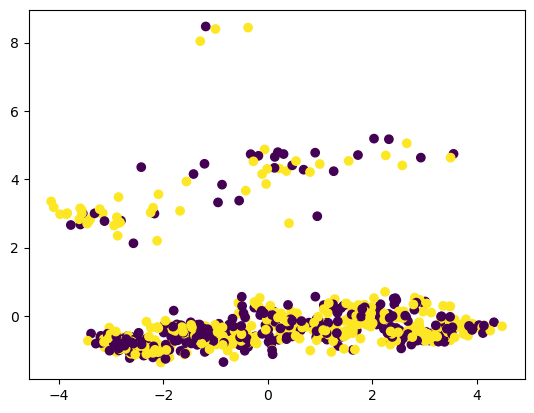

In [133]:
plt.scatter(xtrain2.iloc[:,0],xtrain2.iloc[:,1],c=ytrain)

In [134]:
famd = famd.fit(xtrain)
coords = famd.row_coordinates(xtrain)
xtest=famd.transform(xtest)

In [135]:
coords

component,0,1
471,-3.066345,-0.439142
679,-0.850734,8.541154
846,-0.484556,-0.551212
575,-2.700329,-0.704796
252,-0.959367,-0.679957
...,...,...
289,3.391354,-0.379792
436,0.400414,-0.069129
459,0.847474,-0.445002
857,0.413673,-0.651480


In [136]:
model.fit(coords,ytrain)

LogisticRegression()

In [143]:
(model.predict_proba(xtest.tail(1))[:,1]>0.5)*1

array([1])

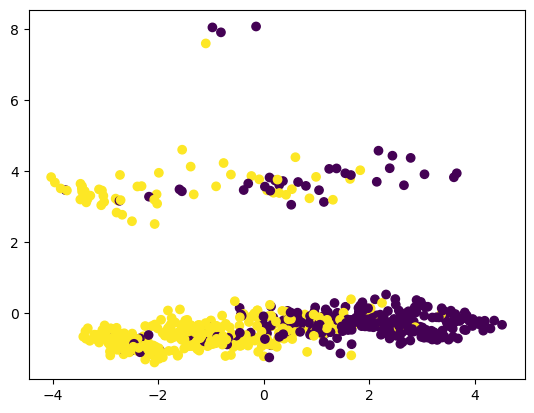

In [41]:
plt.scatter(coords.iloc[:,0],coords.iloc[:,1],c=ytrain)

In [31]:
model=LogisticRegression()
model.fit(coords,ytrain)
model.score(coords,ytrain)

0.840599455040872

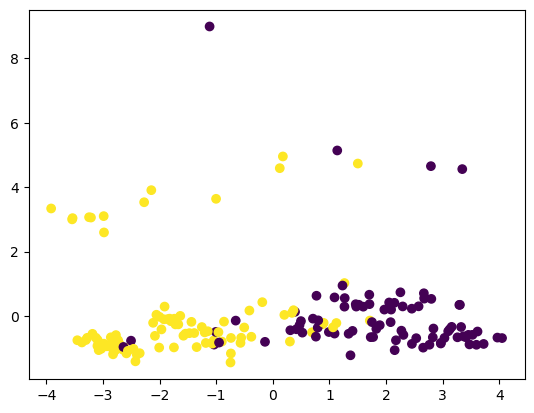

In [32]:
plt.scatter(xtest.iloc[:,0],xtest.iloc[:,1],c=ytest)

In [33]:
model.score(xtest,ytest)

0.8913043478260869

# Approach - 1 - Gower distance

In [ ]:
df[imp_vars]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(df[imp_vars],df.HeartDisease,test_size=0.2)

In [ ]:
res=umap.UMAP(n_neighbors=5, random_state=42).fit(xtrain)

In [ ]:
xtrain=umap.UMAP(n_neighbors=5, random_state=42).fit_transform(xtrain)

In [ ]:
plt.scatter(res.embedding_[:, 0], res.embedding_[:, 1], c=ytrain)

In [ ]:
xtest=res.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
model=SVC()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

In [ ]:
model.score(xtest,ytest)

In [ ]:
plt.scatter(xtest[:,0],xtest[:,1],c=ytest)

In [ ]:
dist_matrix=gower.gower_matrix(df5[imp_vars])

In [ ]:
clusters = (KMedoids(n_clusters=2, metric='precomputed', method='pam', init='build', max_iter=300, 
                     random_state=0).fit(dist_matrix).labels_)

In [ ]:
clusters

In [ ]:
accuracy_score(df5.HeartDisease,1-clusters)

In [ ]:
model=KMedoids(n_clusters=2, metric='precomputed', method='pam', init='build', max_iter=300, 
                     random_state=0).fit(dist_matrix)

In [ ]:
dist_matrix.shape

In [ ]:
umap_embeddings=umap.UMAP(random_state=0, n_components=2).fit_transform(dist_matrix)

In [ ]:
umap_embeddings

In [ ]:
res=pd.DataFrame(umap_embeddings,columns=['x','y'])

In [ ]:
sns.scatterplot(x=res.x,y=res.y,hue=df5.HeartDisease)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(res,df.HeartDisease)

In [ ]:
model.score(res,df.HeartDisease)

In [ ]:
X= np.matrix(res)

x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]
model=MLPClassifier(hidden_layer_sizes=[1], activation='relu', solver='adam', alpha=0.0001)
model.fit(res,df.HeartDisease)
y_pred = model.predict(x_in)

In [ ]:
y_pred=model.predict(res)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
df.HeartDisease

In [ ]:
model.predict_proba(res)

In [ ]:
import seaborn as sns

In [ ]:
a=sns.heatmap(confusion_matrix(y,y_pred),annot=True)

In [ ]:
a.plot()

In [ ]:
y_pred = np.round(y_pred).reshape(xx.shape)

In [ ]:
y=df.HeartDisease

In [ ]:
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter([X[:,0]], [X[:, 1]], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [ ]:
dist_matrix=gower.gower_matrix(df5[imp_vars])
umap_embeddings=umap.UMAP(random_state=0, n_components=2).fit_transform(dist_matrix)
res=pd.DataFrame(umap_embeddings,columns=['x','y'])
X= np.matrix(res)
x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()]
y=df.HeartDisease
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(["gold", "crimson"])
cmap2= matplotlib.colors.ListedColormap(["red", "green"])


In [ ]:
def plot(clf):
    y_pred = clf.predict_proba(x_in)[:,1]
    y_pred = np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, alpha=0.1, cmap='jet')
    plt.scatter([X[:,0]], [X[:, 1]], c=y, s=40, cmap=cmap2)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
plot(model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier()
model.fit(res,df.HeartDisease)

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

mesh_size = .02
margin = 0.25

# Create a mesh grid on which we will run our model
X= np.matrix(res)
x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xrange=np.linspace(x_min,x_max, 100)
yrange=np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()]

# Create classifier, run predictions on grid
clf = model
Z = clf.predict(x_in)
Z = Z.reshape(xx.shape)

In [ ]:
Z=Z.astype(np.int64)

In [ ]:
# Plot the figure
colorscale=colorscale = [
    [0, '#85cc18'],
    [1, '#dc143c']
]
fig1 = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale=colorscale,
        opacity=0.3,
        showscale=False,
        contours=dict(coloring='fill')
    )
])

legend_markers = [
    go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(color='#85cc18', symbol='square', size=10, opacity=0.5),
        name='0',
        legend='legend2'
    ),
    go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(color='#dc143c', symbol='square', size=10, opacity=0.5),
        name='1',
        legend='legend2'
    )
]

fig2= px.scatter(x=res.x,y=res.y,color=df.HeartDisease.astype(str), 
                 color_discrete_sequence=['#52ce00','#dc143c'], symbol_sequence=['x'])
fig2.update_traces(marker_size=15,marker_opacity=0.7)

fig = go.Figure(data=fig1.data + fig2.data, layout=dict(
        title="GDP Per Capita",
        legend=dict(yanchor="top", xanchor="left", x=-0.3, y=1.0,title='Truth labels'),
        legend2={
            "title": "Decision areas",
            "xref": "container",
            "yref": "container",
            "y": 0.83

        },
    ),
)


for marker_trace in legend_markers:
    fig.add_trace(marker_trace)
    
fig.update_layout(plot_bgcolor="white",showlegend=True)


fig.show()

In [ ]:
def plot(clf,prob=False):
    if prob:
        Z = clf.predict_proba(x_in)[:, 1]
        return Z
    else:
        Z = clf.predict(x_in)
    Z = Z.reshape(xx.shape)
    Z=Z.astype(np.int64)
    
    if prob:
        c='jet'
    else:
        c=[[0,'#85cc18'],[1,'#dc143c']]
        
    fig1 = go.Figure(data=[
        go.Contour(
            x=xrange,
            y=yrange,
            z=Z,
            colorscale=c,
            opacity=0.5,
            showscale=prob
        )
    ])
    
    fig2= px.scatter(x=res.x,y=res.y,color=df.HeartDisease.astype(str), 
                     color_discrete_sequence=['#52ce00','#dc143c'], symbol_sequence=['x'])
    fig2.update_traces(marker_size=15,marker_opacity=0.7, showlegend=(not prob))
    
    
    fig=go.Figure(data=fig1.data+fig2.data)
    fig.update_layout(plot_bgcolor="white")
    return Z

In [ ]:
model=MLPClassifier(hidden_layer_sizes=[2]*5, activation='relu', solver='adam', alpha=0.0001)

In [ ]:
plot(model,prob=True)

In [ ]:
xrange

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
np.arange()

In [ ]:
# Load and split data
X= np.matrix(res)
x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))
xrange=np.linspace(x_min,x_max, 100)
yrange=np.linspace(y_min, y_max, 100)
x_in = np.c_[xx.ravel(), yy.ravel()]

# Create classifier, run predictions on grid
clf = model
Z = clf.predict(x_in)#[:, 1]
Z = Z.reshape(xx.shape)

# trace_specs = [
#     [X_train, y_train, '0', 'Train', 'square'],
#     [X_train, y_train, '1', 'Train', 'circle'],
# ]

fig = go.Figure(data=go.Scatter(x=res.x,y=res.y,mode='markers',marker_color=df.HeartDisease))
fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4
    )
)
fig.update_layout(plot_bgcolor="white")
#fig.update_xaxes(showline=True, linewidth=1, gridcolor='gray')
fig.update_yaxes(showline=True, linewidth=1, gridcolor='gray')
fig.show()

In [ ]:
yrange.max()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import dtreeviz

In [ ]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(res,df.HeartDisease)

In [ ]:
viz_model = dtreeviz.model(model,
                           X_train=res, y_train=df.HeartDisease.astype(int),
                           feature_names=['x','y'],
                           target_name='Heart Disease',
                           class_names=['0','1'])

v = viz_model.view()     # render as SVG into internal object 

In [ ]:
v.show()

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=['x','y'],  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
from matplotlib import pyplot
from math import cos, sin, atan, sqrt

def create_neuron(x, y):
    return {'x': x, 'y': y}

def draw_neuron(neuron, neuron_radius):
    circle = pyplot.Circle((neuron['x'], neuron['y']), radius=neuron_radius, fill=False)
    pyplot.gca().add_patch(circle)

def line_between_two_neurons(neuron1, neuron2, neuron_radius):
    angle = atan((neuron2['x'] - neuron1['x']) / float(neuron2['y'] - neuron1['y']))
    x_adjustment = neuron_radius * sin(angle)
    y_adjustment = neuron_radius * cos(angle)
    line = pyplot.Line2D((neuron1['x'] + x_adjustment, neuron2['x'] - x_adjustment),
                         (neuron1['y'] + y_adjustment, neuron2['y'] - y_adjustment))
    pyplot.gca().add_line(line)

def create_layer(network, number_of_neurons, number_of_neurons_in_widest_layer, prev_layer=None):
    vertical_distance_between_layers = 6
    horizontal_distance_between_neurons = 2
    neuron_radius = 0.5
    y = prev_layer['y'] - vertical_distance_between_layers if prev_layer else 0

    neurons = []
    x = horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2
    for _ in range(number_of_neurons):
        neuron = create_neuron(x, y)
        neurons.append(neuron)
        x += horizontal_distance_between_neurons

    return {
        'vertical_distance_between_layers': vertical_distance_between_layers,
        'horizontal_distance_between_neurons': horizontal_distance_between_neurons,
        'neuron_radius': neuron_radius,
        'number_of_neurons_in_widest_layer': number_of_neurons_in_widest_layer,
        'previous_layer': prev_layer,
        'y': y,
        'neurons': neurons
    }

def draw_layer(layer, layer_type=0):
    for neuron in layer['neurons']:
        draw_neuron(neuron, layer['neuron_radius'])

    if layer['previous_layer']:
        for neuron in layer['neurons']:
            for prev_neuron in layer['previous_layer']['neurons']:
                line_between_two_neurons(neuron, prev_neuron, layer['neuron_radius'])

    x_text = layer['number_of_neurons_in_widest_layer'] * layer['horizontal_distance_between_neurons']
    y_text = layer['y'] - layer['vertical_distance_between_layers'] * 0.1 
    if layer_type == 0:
        pyplot.text(x_text, y_text, 'Input Layer', fontsize=12)
    elif layer_type == -1:
        pyplot.text(x_text, y_text, 'Output Layer', fontsize=12)
    else:
        pyplot.text(x_text, y_text, f'Hidden Layer {layer_type}', fontsize=12)

def create_network(neurons_list):
    widest_layer = max(neurons_list)
    layers = []
    prev_layer = None
    for i, neurons in enumerate(neurons_list):
        layer = create_layer(layers, neurons, widest_layer, prev_layer)
        layers.append(layer)
        prev_layer = layer
    return layers

def draw_network(layers):
    widest_layer_neurons = max(layer['number_of_neurons_in_widest_layer'] for layer in layers)
    fig_width = widest_layer_neurons * 2 
    fig_height = len(layers) * 2 

    fig = pyplot.figure(figsize=(fig_width, fig_height))
    for i, layer in enumerate(layers):
        draw_layer(layer, i if i != len(layers) - 1 else -1)

    pyplot.axis('scaled')
    pyplot.axis('off')
    pyplot.title('Neural Network architecture', fontsize=15)
    return fig

In [ ]:
neurons_list = [2, 8, 8,7,7,7, 1]
network = create_network(neurons_list)
fig = draw_network(network)
pyplot.show(fig)

In [ ]:
neurons_list = [9,5,5,1]
network = create_network(neurons_list)
fig=draw_network(network)

In [ ]:
fig